In [64]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split 

## Modelo de Câncer de Mama

Separação de Dados

In [71]:
X, y = load_breast_cancer(return_X_y = True)
print(X.shape, y.shape)

(569, 30) (569,)


Aplicação do Modelo

Os melhores parâmetros foram: {'n_neighbors': 3}
O valor da acurácia foi de 0.92
O valor de precisão foi de 0.93
O valor da revocação foi de 0.91
O valor de F1 foi de 0.92


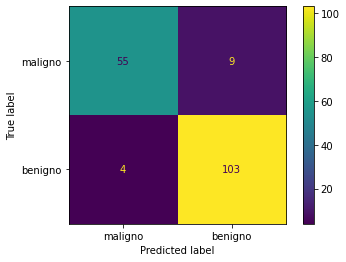

In [72]:
# Divisão de dados para aprendizado
X, X_test, y, y_test = train_test_split(X,y, train_size=0.7, random_state=46, stratify=y)

# Divisão de dados para validação
X, X_val, y, y_val = train_test_split(X,y, train_size=0.8, random_state=46, stratify=y)

# Declaração de parâmetros
#params = [{"criterion" : ["gini", "entropy", "log_loss"], "splitter": ["best", "random"]}] # Árvore de Decisão
# params = [{'n_neighbors': [1, 3, 5, 7, 9, 11]}] # K-Nearest Neighbors: Sem pesos
#params = [{'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}] # K-Nearest Neighbors: Com pesos
#params = [{'var_smoothing':[1e-09, 1e-03, 1e-06]}] # GaussianNB

# Definição do classificador
clf = KNeighborsClassifier()
#clf = DecisionTreeClassifier()
#clf = GaussianNB()

gs = GridSearchCV(clf, params, cv=5)
gs.fit(X_val, y_val)
print(f"Os melhores parâmetros foram: {gs.best_params_}")


clf = gs.best_estimator_

clf.fit(X, y)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("O valor da acurácia foi de {:.2f}".format(accuracy))

precision = precision_score(y_test, y_pred, average="macro")
print("O valor de precisão foi de {:.2f}".format(precision))

recall = recall_score(y_test, y_pred, average="macro")
print("O valor da revocação foi de {:.2f}".format(recall))

f1 = f1_score(y_test, y_pred, average="macro")
print("O valor de F1 foi de {:.2f}".format(f1))

matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix, display_labels=["maligno", "benigno"])
display.plot()